In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
CURR_DIR = os.getcwd()

MAIN_DIR = '.'
if os.path.basename(os.getcwd())!="Project_Work22.04":
    os.chdir("..")
DATA_DIR = os.path.join(MAIN_DIR,"Data")
FITS_DIR = os.path.join(MAIN_DIR,"Fits")

In [3]:
data_files = glob.glob(MAIN_DIR + "/**/*.csv", recursive=True)
data_files

['./Codes/Data.csv',
 './Data/GD61_simbad.csv',
 './Data/GD61-100pxData-Sheet1.csv',
 './Data/Gaia-result.csv']

In [4]:
# df = pd.read_csv(data_files[1])
# df

In [5]:
data = pd.read_csv(data_files[2])
data

,F60,RA,DEC,F100,RA.1,DEC.1,F90,RA.2,DEC.2,F140,RA.3,DEC.3
0,2.697014,70.182691,42.337354,13.488068,70.182691,42.337354,9.889684,70.182691,42.337354,32.875832,70.182691,42.337354
1,2.680743,70.162405,42.337529,13.365788,70.162405,42.337529,9.770711,70.162405,42.337529,34.103275,70.162405,42.337529
2,2.683365,70.142119,42.337700,13.203613,70.142119,42.337700,9.646331,70.142119,42.337700,33.310413,70.142119,42.337700
3,2.683365,70.121832,42.337869,13.203613,70.121832,42.337869,9.182345,70.121832,42.337869,33.532291,70.121832,42.337869
4,2.698450,70.101545,42.338033,13.048645,70.101545,42.338033,9.734934,70.101545,42.338033,33.038879,70.101545,42.338033
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.610694,68.276120,40.853305,12.697386,68.276120,40.853305,8.738417,68.276120,40.853305,29.601938,68.276120,40.853305
9996,2.610694,68.256294,40.853148,12.697386,68.256294,40.853148,8.454762,68.256294,40.853148,27.258862,68.256294,40.853148
9997,2.589867,68.236469,40.852989,12.545191,68.236469,40.852989,8.020433,68.236469,40.852989,28.135590,68.236469,40.852989
9998,2.539662,68.216644,40.852826,12.589022,68.216644,40.852826,7.879667,68.216644,40.852826,28.113480,68.216644,40.852826


In [9]:
def nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [14]:
nearest(data['DEC.1'], 41.1589833)

41.15678615

In [19]:
wd = data.loc[data["DEC.1"]==41.15678615]
wd

,F60,RA,DEC,F100,RA.1,DEC.1,F90,RA.2,DEC.2,F140,RA.3,DEC.3
7949,2.376567,69.188294,41.156786,12.015101,69.188294,41.156786,8.855742,69.188294,41.156786,29.242199,69.188294,41.156786
7950,2.376567,69.168372,41.156786,12.015101,69.168372,41.156786,8.989835,69.168372,41.156786,28.678055,69.168372,41.156786


In [33]:
# print(np.max(data.RA), np.min(data.RA))
# print(np.max(data.DEC), np.min(data.DEC))

In [7]:
min(data.F100), max(data.F100)

(9.719145775, 16.51480293)

## TEMPERATURE CALCULATION

In [6]:
Temp = -96/(np.log((data.F60/data.F100)*0.6**5))
data['Temp_iras'] = Temp
Temp1 = -57/(np.log((data.F60/data.F100)*0.6**5))
data['Temp_akari'] = Temp1
data

,F60,RA,DEC,F100,RA.1,DEC.1,F90,RA.2,DEC.2,F140,RA.3,DEC.3,Temp_iras,Temp_akari
0,2.697014,70.182691,42.337354,13.488068,70.182691,42.337354,9.889684,70.182691,42.337354,32.875832,70.182691,42.337354,23.055927,13.689457
1,2.680743,70.162405,42.337529,13.365788,70.162405,42.337529,9.770711,70.162405,42.337529,34.103275,70.162405,42.337529,23.072861,13.699511
2,2.683365,70.142119,42.337700,13.203613,70.142119,42.337700,9.646331,70.142119,42.337700,33.310413,70.142119,42.337700,23.146212,13.743063
3,2.683365,70.121832,42.337869,13.203613,70.121832,42.337869,9.182345,70.121832,42.337869,33.532291,70.121832,42.337869,23.146212,13.743063
4,2.698450,70.101545,42.338033,13.048645,70.101545,42.338033,9.734934,70.101545,42.338033,33.038879,70.101545,42.338033,23.243793,13.801002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.610694,68.276120,40.853305,12.697386,68.276120,40.853305,8.738417,68.276120,40.853305,29.601938,68.276120,40.853305,23.211347,13.781737
9996,2.610694,68.256294,40.853148,12.697386,68.256294,40.853148,8.454762,68.256294,40.853148,27.258862,68.256294,40.853148,23.211347,13.781737
9997,2.589867,68.236469,40.852989,12.545191,68.236469,40.852989,8.020433,68.236469,40.852989,28.135590,68.236469,40.852989,23.234093,13.795243
9998,2.539662,68.216644,40.852826,12.589022,68.216644,40.852826,7.879667,68.216644,40.852826,28.113480,68.216644,40.852826,23.105126,13.718669


In [35]:
print("IRAS Temp:")
print('Tmax:',np.max(data.Temp_iras),'offset:', (np.max(data.Temp_iras)-np.mean(data.Temp_iras))/2)  #max error value = (Tmax-Tavg)/2
print('Tmin:',np.min(data.Temp_iras),'offset:', (np.mean(data.Temp_iras)-np.min(data.Temp_iras))/2)  #max error value = (Tavg-Tmin)/2
print('Tavg:',np.mean(data.Temp_iras),'offset:', np.std(data.Temp_iras)/np.sqrt(len(data.Temp_iras))) #avg error value = SE = sd/sqrt(n)

IRAS Temp:
Tmax: 24.39299648491247 offset: 0.6170504931957446
Tmin: 22.533352567165 offset: 0.3127714656779901
Tavg: 23.15889549852098 offset: 0.001855444309638055


In [36]:
print("Akari Temp:")
print('Tmax:',np.max(data.Temp_akari),'offset:', (np.max(data.Temp_akari)-np.mean(data.Temp_akari))/2)  
print('Tmin:',np.min(data.Temp_akari),'offset:', (np.mean(data.Temp_akari)-np.min(data.Temp_akari))/2)  
print('Tavg:',np.mean(data.Temp_akari),'offset:', np.std(data.Temp_akari)/np.sqrt(len(data.Temp_akari))) 

Akari Temp:
Tmax: 14.483341662916779 offset: 0.3663737303349741
Tmin: 13.37917808675422 offset: 0.1857080577463055
Tavg: 13.75059420224683 offset: 0.001101670058847595


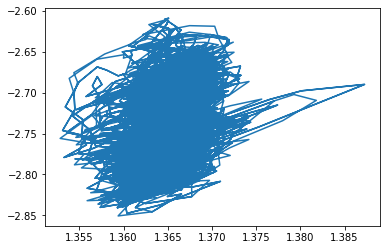

In [9]:
T = np.log10(data.Temp_iras)
R = np.log10(data.F60/1368)
plt.plot(T, R)

## SCATTER PLOT

In [29]:
def scatter(data1, data2):
    coeff = np.polyfit(data1, data2, deg=1)
    p = np.poly1d(coeff)
    y = p(data1)
    plt.plot(data1, y, label='Straight Line Fit', lw=3, color='black')
    plt.scatter(data1, data2, color='m', label='data')
    plt.legend()

(Text(0.5, 0, 'F100'), Text(0, 0.5, 'F60'))

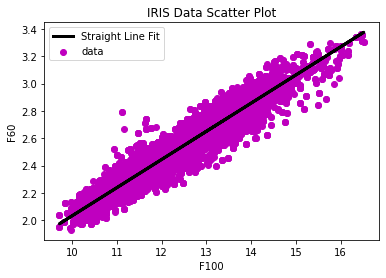

In [30]:
scatter(data['F100'], data['F60'])
plt.title('IRIS Data Scatter Plot')
plt.xlabel('F100'), plt.ylabel('F60')

(Text(0.5, 0, 'F140'), Text(0, 0.5, 'F90'))

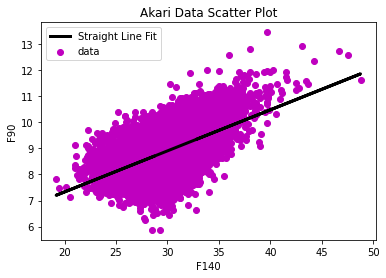

In [31]:
scatter(data.F140, data.F90)
plt.title('Akari Data Scatter Plot')
plt.xlabel('F140'), plt.ylabel('F90')

## CONTOUR PLOT

Text(0.5, 1.0, 'IRIS Tricontour 60 $\\mu m$')

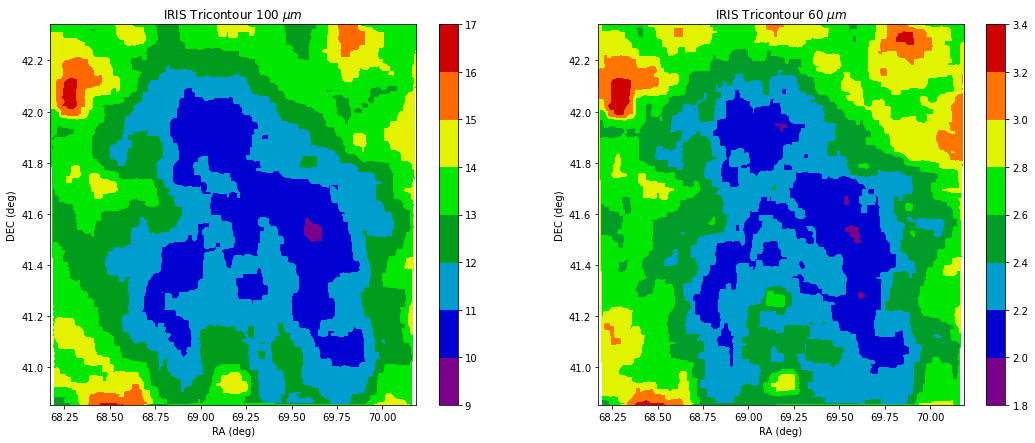

In [6]:
def Tricontour(X, Y, Data):
    plt.tricontourf(X, Y, Data, cmap='nipy_spectral', levels=7) #contour only plots boundary, contourf plots color-filled contour
    plt.colorbar()
    plt.xlabel('RA (deg)'), plt.ylabel('DEC (deg)')
plt.figure(figsize=(18,7))
plt.subplot(121)
plt.title('IRIS Tricontour 100 $\mu m$')
Tricontour(data.RA, data.DEC, data.F100)
plt.subplot(122)
Tricontour(data.RA, data.DEC, data.F60)
plt.title('IRIS Tricontour 60 $\mu m$')

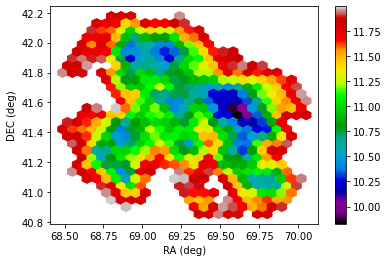

In [17]:
data1 = data[data.F100<12]
len(data1)
HexBin(data1.RA, data1.DEC, data1.F100)

Text(0.5, 1.0, 'Akari-L Tricontour')

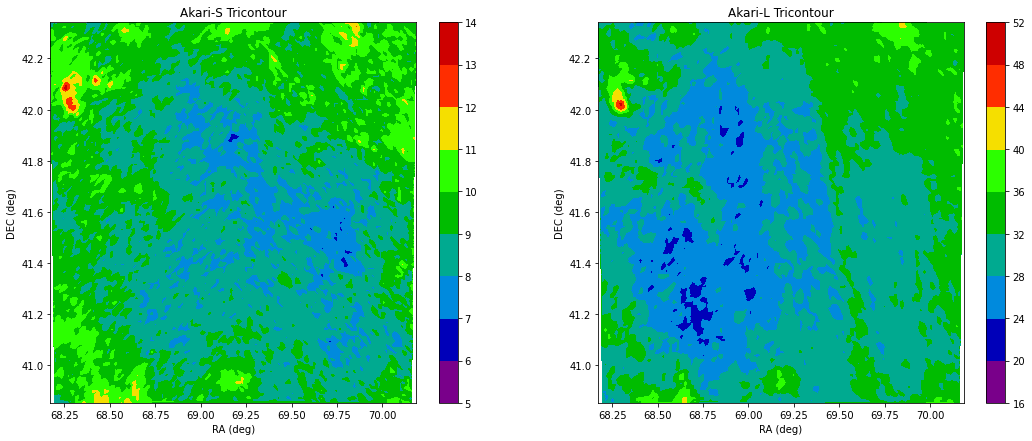

In [33]:
plt.figure(figsize=(18,7))
plt.subplot(121)
plt.title('Akari-S Tricontour')
Tricontour(data['RA.2'], data['DEC.2'], data.F90)
plt.subplot(122)
Tricontour(data['RA.3'], data['DEC.3'], data.F140)
plt.title('Akari-L Tricontour')

## HEXBIN CONTOUR

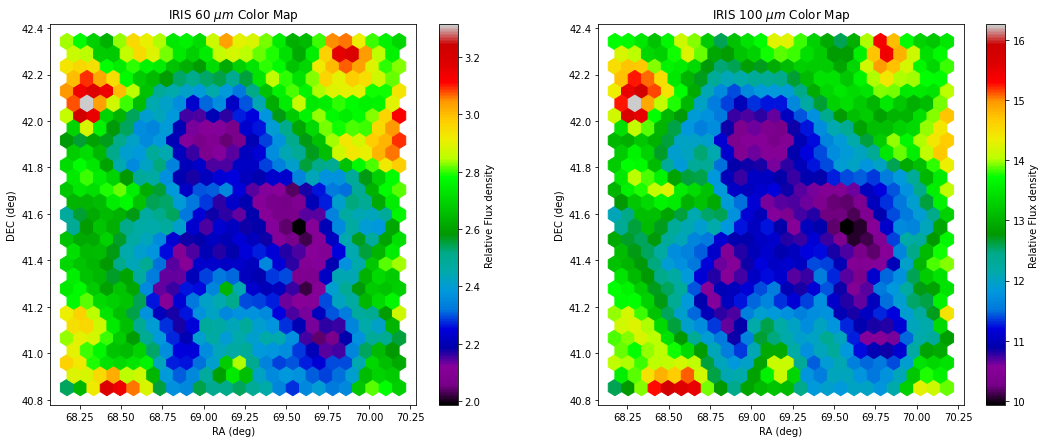

In [18]:
def HexBin(X, Y, Data):
    plt.hexbin(X, Y, Data, gridsize=25, cmap='nipy_spectral')
    plt.colorbar().set_label('Relative Flux density')
    plt.xlabel('RA (deg)'),plt.ylabel('DEC (deg)')

    
plt.figure(figsize=(18,7))
plt.subplot(121)
# plt.title('IRIS 60 $\mu m$ Color Map')
HexBin(data.RA, data.DEC, data.F60)
plt.subplot(122)
# plt.title('IRIS 100 $\mu m$ Color Map')
HexBin(data.RA, data.DEC, data.F100)
plt.show()

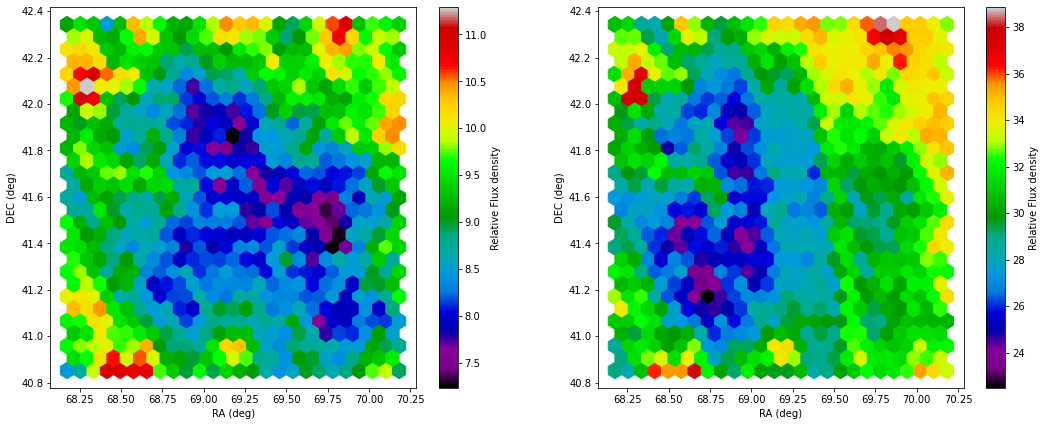

In [19]:
plt.figure(figsize=(18,7))
plt.subplot(121)
# plt.title('Akari-S Dust Color Map')
HexBin(data['RA.2'], data['DEC.2'], data.F90)
plt.subplot(122)
# plt.title('Akari-L Dust Color Map')
HexBin(data['RA.3'], data['DEC.3'], data.F140)
plt.show()

## SPECTRAL EMISSIVITY

In [36]:
beta_range = np.arange(0,3.1, 0.1)
def Emissivity(F1, F2):
    Temp = []
    Beta = []
    for i in beta_range:
        t = -96/(np.log(F1/F2)*0.6**(3+i))
        Temp.append(t)
        Beta.append(i)
    Tavg = [np.mean(Temp[i]) for i in range(len(Temp))]
    Y_err = np.std(Tavg)/np.sqrt(len(Tavg))
    
    p = np.poly1d(np.polyfit(Beta, Tavg, deg=2)) #polynomial
    y = p(Beta)
    plt.figure(figsize=(15,8))
    _, caps, _ = plt.errorbar(Beta, Tavg, Y_err, fmt='ok', capsize=3, label='Datapoints')

    plt.plot(Beta, y, label='Best Fit', lw=3, color='r')
    plt.xlabel('SPECTRAL EMISSIVITY (Beta)'), plt.ylabel('AVERAGE TEMPRATURE (Tavg)')
    plt.legend()

Text(0.5, 1.0, 'IRIS Data Spectral Emissivity')

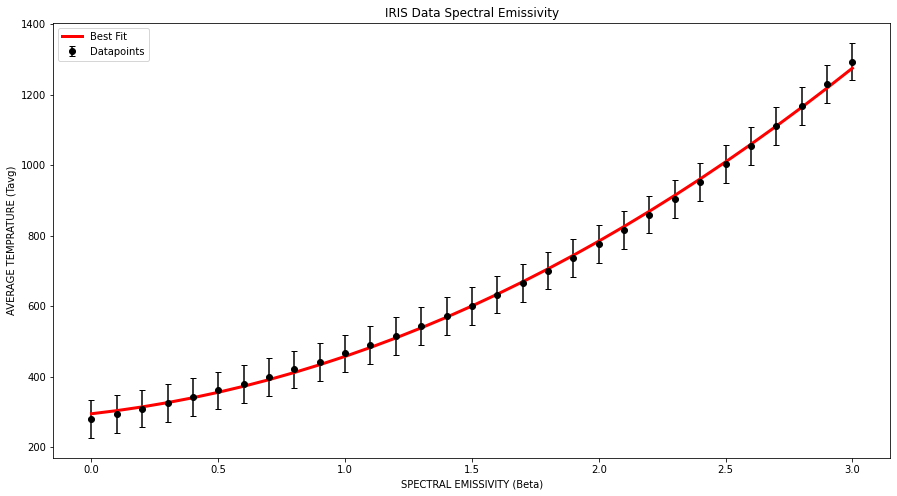

In [37]:
Emissivity(data.F60, data.F100)
plt.title('IRIS Data Spectral Emissivity')

Text(0.5, 1.0, 'Akari Data Spectral Emissivity')

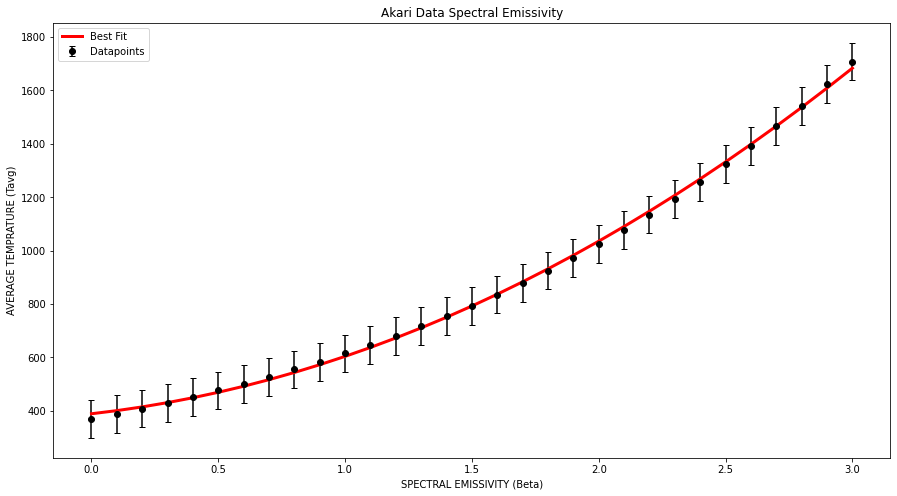

In [38]:
Emissivity(data.F90, data.F140)
plt.title('Akari Data Spectral Emissivity')

## GAUSSIAN FIT

In [20]:
def gaussian(x, nbins):
    mu = np.mean(x)
    sigma = np.std(x)
    n, bins, patches = plt.hist(x, num_bins, density=True)
    y = ((1/(np.sqrt(2 * np.pi) * sigma))*np.exp(-0.5 * (1/sigma*(bins - mu))**2))
    plt.plot(bins, y, '--', lw=3)
    plt.tight_layout()

In [21]:
num_bins = 30
# plt.figure(figsize=(20,10))
# plt.subplot(121)
# plt.title('IRIS 100 $\mu m Data Gaussian Fit')
# plt.xlabel('Flux at 100 $\mu m$')
# plt.ylabel('Probability Density')
# gaussian(data.F100, num_bins)
# plt.subplot(122)
# plt.title('IRIS 60 $\mu m Data Gaussian Fit')
# plt.xlabel('Flux at 60 $\mu m$')
# plt.ylabel('Probability Density')
# gaussian(data.F60, num_bins)

In [41]:
# plt.figure(figsize=(20,10))
# plt.subplot(121)
# plt.title('Akari-S Data Gaussian Fit')
# plt.xlabel('Flux at 90 $\mu m$')
# plt.ylabel('Probability Density')
# gaussian(data['F90'], num_bins)
# plt.subplot(122)
# plt.title('Akari-L Data Gaussian Fit')
# plt.xlabel('Flux at 140 $\mu m$')
# plt.ylabel('Probability Density')
# gaussian(data['F140'], num_bins)

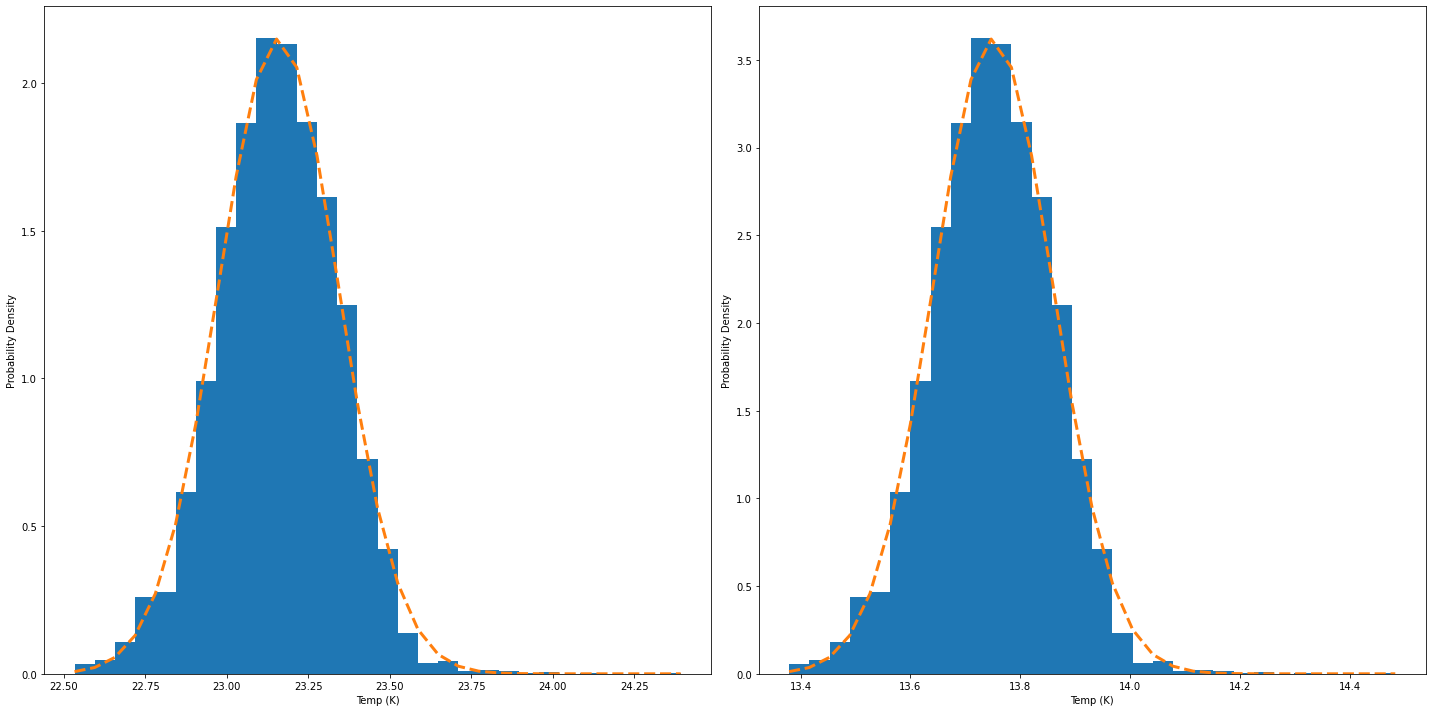

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(121)
# plt.title('IRIS Temperature Gaussian Fit')
plt.xlabel('Temp (K)')
plt.ylabel('Probability Density')
gaussian(data['Temp_iras'], num_bins)
plt.subplot(122)
# plt.title('Akari Temperature Gaussian Fit')
plt.xlabel('Temp (K)')
plt.ylabel('Probability Density')
gaussian(data['Temp_akari'], num_bins)

## DISTANCE CALCULATION BY PARALLAX METHOD

In [41]:
df = pd.read_csv(data_files[3])
df
len(df.parallax)
# plt.hist(df.parallax)
# df['parallax'].isnull().sum() #check for NaN

99832

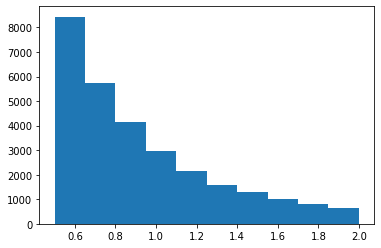

In [42]:
df1 = df[(df.parallax > 0) & (df.parallax<2) & (df.parallax>0.5)] # select 0.5<parallax>10 i.e. 166.67pc<d<2kpc, 
# len(df1)
plt.hist(df1.parallax)
sd = np.std(df1.parallax)
mean = np.mean(df1.parallax)
Range = mean-sd, mean+sd     # select the parallax data within the Range
del df1
# Range

In [43]:
df = df[(df.parallax>Range[0]) & (df.parallax<Range[1])]
len(df)
# df['parallax'].isnull().sum() #check for NaN

20541

In [44]:
df_prlx = df[(df.parallax/df.parallax_error>5)] #remove data with relative error<5 i.e with error >20%
len(df_prlx)
# plt.hist(df_prlx.parallax)

6527

In [45]:
# plt.figure(figsize=(8,8))
# plt.plot(df_prlx.ra, df_prlx.dec, 'or')

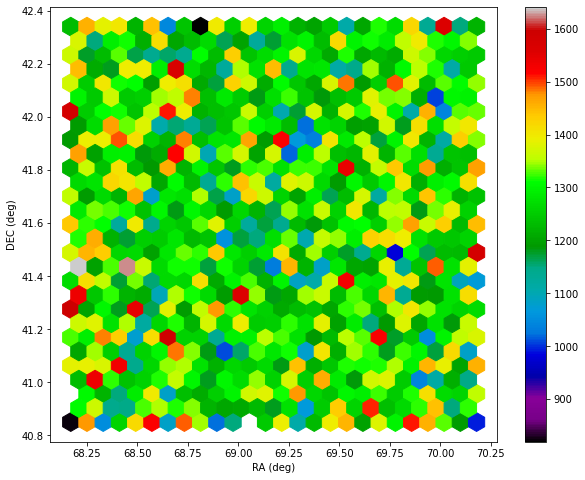

In [46]:
plt.figure(figsize=(10,8))
HexBin(df_prlx.ra, df_prlx.dec, 1000/df_prlx.parallax)

In [47]:
Dis = 1000/np.mean(df_prlx.parallax)
Dis # mean distance in pc

1215.3308148458173

## MASS CALCULATION

In [48]:
c = 3.0E+8      # speed of light in vacuum
h = 6.62E-34    # Planck's constant
kB = 1.38E-23   # Boltzmann constant
lam_iras = 10.0E-3    # Long-Wavelength IRAS
lam_akari = 1.4E-4    # Long-Wavelength Akari

In [49]:
def Mass(lam, Temp, Dis, flux):
    def planck(lam):
        a = np.exp(h*c/(kB*lam*Temp))
        b = 1/(a-1)
        Bv = h*c*b/lam**3     # Planck distribution
        return Bv    
    Su = flux*5.288*10**-29   # Absolute Flux 
    D = Dis*3.0857*10**16     # D in Km, Dis in pc
    M = 0.4*Su*D**2/planck(lam)
    return M

In [50]:
M_iras = Mass(lam_iras, data.Temp_iras, Dis, data.F100)
data['Mass_iras'] = M_iras
np.mean(M_iras/(2E+30))   #in solar mass

0.05923462378204768

In [51]:
M_akari = Mass(lam_akari, data.Temp_akari, Dis, data.F140)
data['Mass_akari'] = M_akari
np.mean(M_akari/(2E+30))   #in solar mass

0.010871294907211388

In [52]:
data

,F60,RA,DEC,F100,RA.1,DEC.1,F90,RA.2,DEC.2,F140,RA.3,DEC.3,Temp_iras,Temp_akari,Mass_iras,Mass_akari
0,2.697014,70.182691,42.337354,13.488068,70.182691,42.337354,9.889684,70.182691,42.337354,32.875832,70.182691,42.337354,23.055927,13.689457,1.301249e+29,2.463980e+28
1,2.680743,70.162405,42.337529,13.365788,70.162405,42.337529,9.770711,70.162405,42.337529,34.103275,70.162405,42.337529,23.072861,13.699511,1.288476e+29,2.541920e+28
2,2.683365,70.142119,42.337700,13.203613,70.142119,42.337700,9.646331,70.142119,42.337700,33.310413,70.142119,42.337700,23.146212,13.743063,1.268682e+29,2.424448e+28
3,2.683365,70.121832,42.337869,13.203613,70.121832,42.337869,9.182345,70.121832,42.337869,33.532291,70.121832,42.337869,23.146212,13.743063,1.268682e+29,2.440597e+28
4,2.698450,70.101545,42.338033,13.048645,70.101545,42.338033,9.734934,70.101545,42.338033,33.038879,70.101545,42.338033,23.243793,13.801002,1.248364e+29,2.330306e+28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.610694,68.276120,40.853305,12.697386,68.276120,40.853305,8.738417,68.276120,40.853305,29.601938,68.276120,40.853305,23.211347,13.781737,1.216510e+29,2.109756e+28
9996,2.610694,68.256294,40.853148,12.697386,68.256294,40.853148,8.454762,68.256294,40.853148,27.258862,68.256294,40.853148,23.211347,13.781737,1.216510e+29,1.942763e+28
9997,2.589867,68.236469,40.852989,12.545191,68.236469,40.852989,8.020433,68.236469,40.852989,28.135590,68.236469,40.852989,23.234093,13.795243,1.200715e+29,1.990650e+28
9998,2.539662,68.216644,40.852826,12.589022,68.216644,40.852826,7.879667,68.216644,40.852826,28.113480,68.216644,40.852826,23.105126,13.718669,1.211847e+29,2.073610e+28


In [56]:
# min(data.Temp_akari)-max(data.Temp_akari)

In [24]:
data.Temp_iras.corr(data.Mass_iras)

-0.03493679805860207

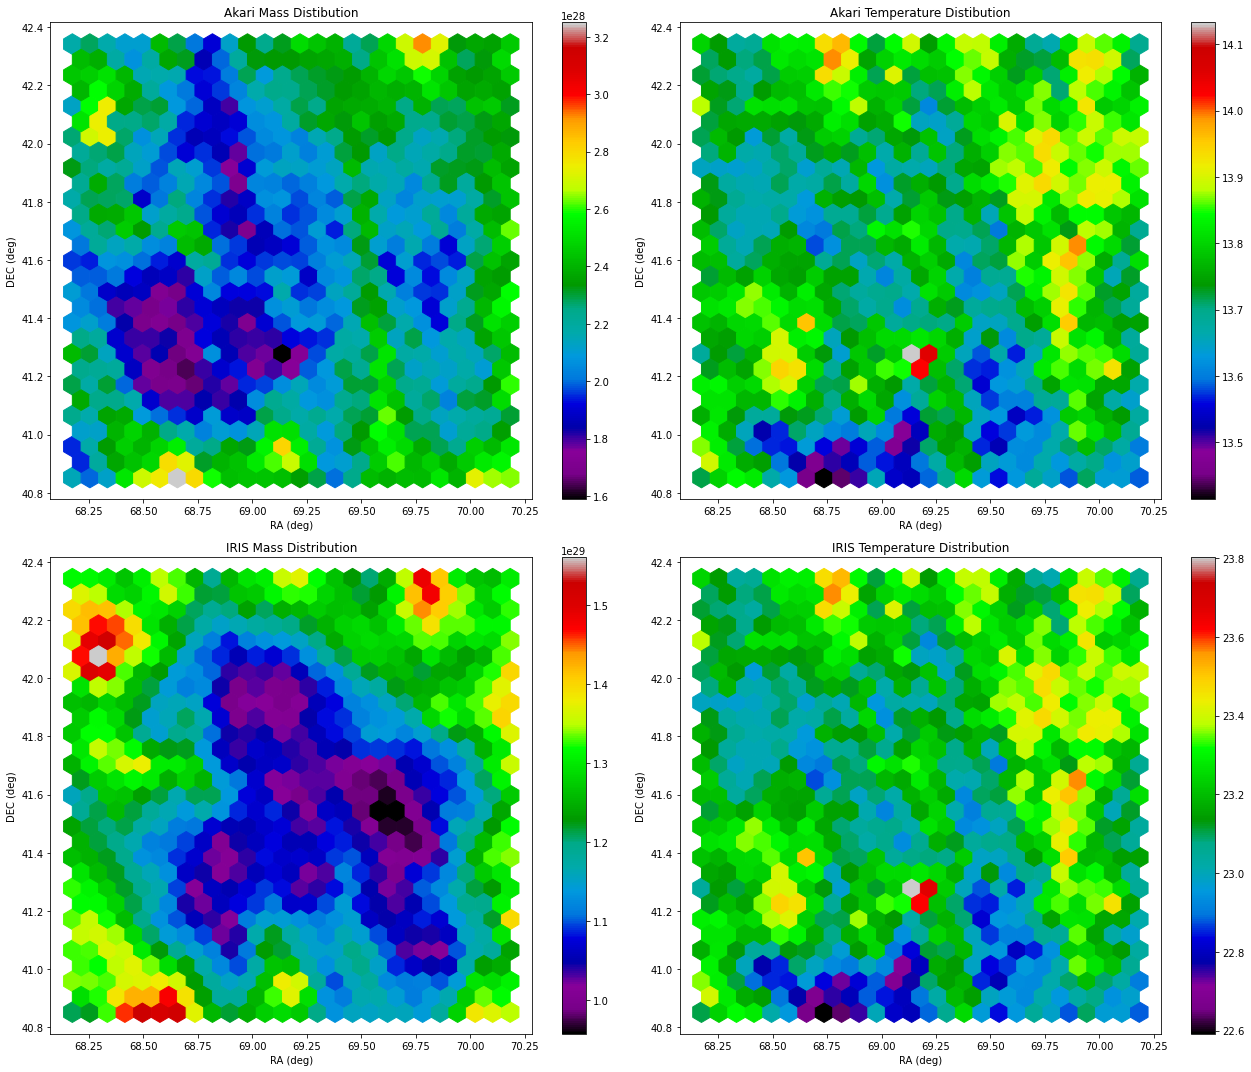

In [53]:
plt.figure(figsize=(18,15))
plt.subplot(221)
plt.title('Akari Mass Distibution')
HexBin(data['RA.3'], data['DEC.3'], data.Mass_akari)
plt.subplot(222)
plt.title('Akari Temperature Distibution')
HexBin(data['RA.3'], data['DEC.3'], data.Temp_akari)


plt.subplot(223)
plt.title('IRIS Mass Distribution')
HexBin(data.RA, data.DEC, data.Mass_iras)
plt.subplot(224)
plt.title('IRIS Temperature Distribution')
HexBin(data.RA, data.DEC, data.Temp_iras)
plt.tight_layout()
plt.show()

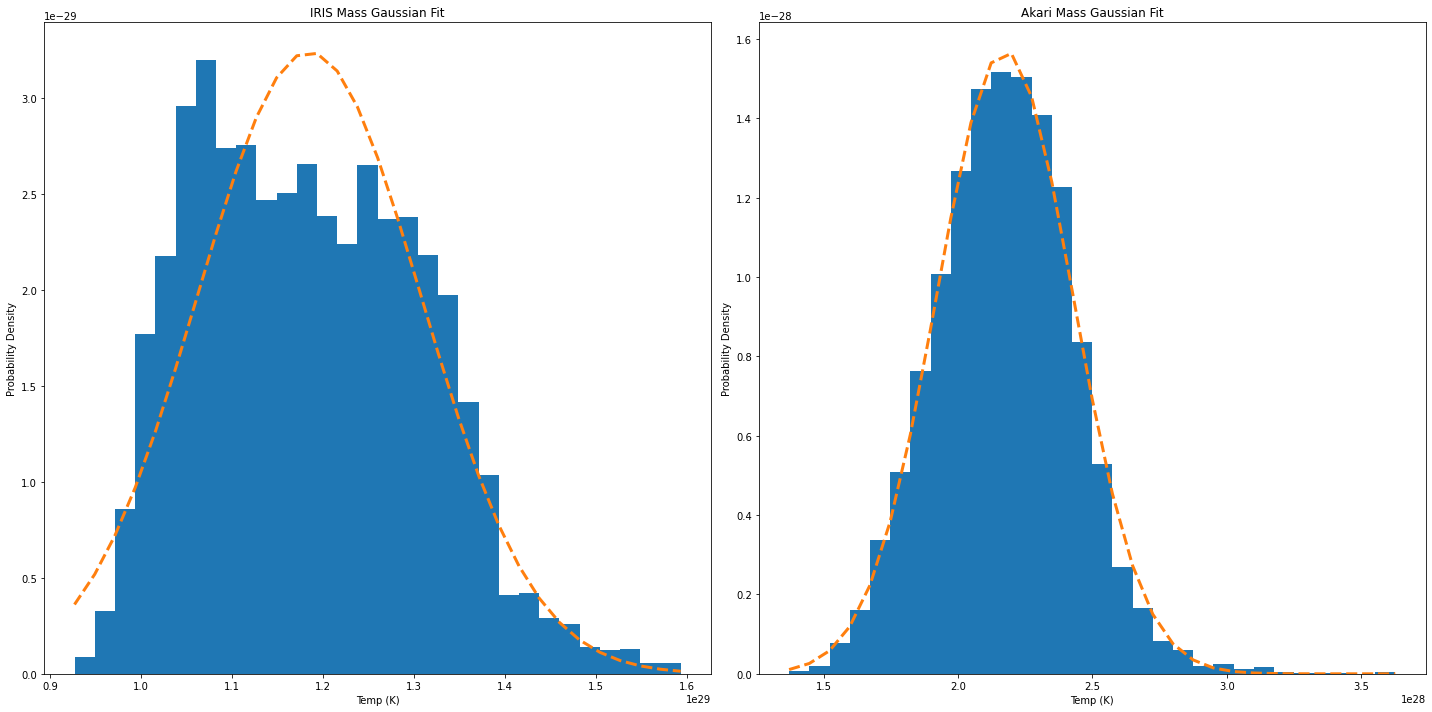

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('IRIS Mass Gaussian Fit')
plt.xlabel('Temp (K)')
plt.ylabel('Probability Density')
gaussian(data['Mass_iras'], num_bins)
plt.subplot(122)
plt.title('Akari Mass Gaussian Fit')
plt.xlabel('Temp (K)')
plt.ylabel('Probability Density')
gaussian(data['Mass_akari'], num_bins)

In [100]:
A =[]
def extinction(lam, Temp, flux):
    a = np.exp(h*c/(kB*lam*Temp))
    b = 1/(a-1)
    planck = h*c*b/lam**3
    opt_depth = (flux/planck)
#     for i in opt_depth:
#         A[i] = 15.078(1-np.exp(opt_depth[i]/641.3))
    return opt_depth

In [106]:
tau = extinction(lam_akari, data.Temp_iras, data.F100)
# e = np.exp(-tau/)
np.exp(-tau/641.3)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Length: 10000, dtype: float64

## JEANS MASS

In [ ]:
# M = K*P^(3/2)/(rho^2*G^(3/2))

## INCLINATION ANGLE

In [4]:
# size of cavity = 23.184pc x 11.97pc
axial_ratio = 1/1.931  # b/a
int_flat = 0.23 # (for now) 
ratio = (axial_ratio**2-int_flat**2)/(1-int_flat**2)
inc_angle = np.arccos(np.sqrt(ratio))*180/np.pi   # in degrees
inc_angle

61.52529619994411

In [ ]:
#min axis = 33.44' = 11.82pc
#maj ais = 1.093^o = 23.184 pc